1759.0
1451.0
1193.0


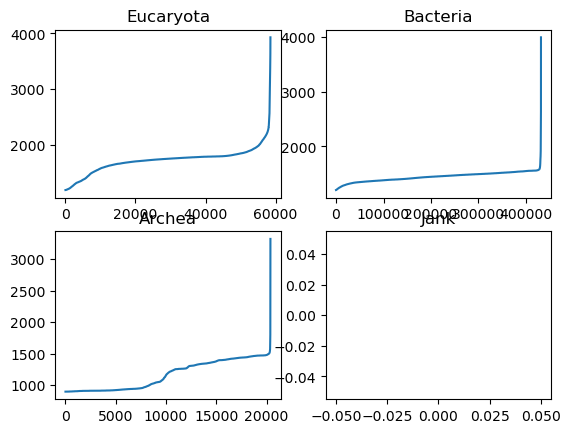

In [104]:
from Bio import SeqIO
from Bio.Seq import Seq
import operator
import math
import numpy

import Bio

import matplotlib.pyplot as plt


euk =[]
pro=[]
arc=[]
jank=[]
count=int(0)

with open("csado7/SILVA132/SILVA/library/silva.fna") as input_handle:
    for record in SeqIO.parse(input_handle, "fasta"):
        count+=1
        
        curr_genus_length = len(record.seq)
        #print(record.description.split(' ',1)[1].split(';')[0])
        if record.description.split(' ',1)[1].split(';')[0] == "Eukaryota" :
            euk.append(curr_genus_length)
        elif record.description.split(' ',1)[1].split(';')[0] == "Bacteria" :
            pro.append(curr_genus_length)
        elif record.description.split(' ',1)[1].split(';')[0] == "Archaea" :
            arc.append(curr_genus_length)
        else:
            jank.append(curr_genus_length)

            
euk.sort()
print(numpy.median(euk))

plt.subplot(2, 2, 1)
plt.plot(euk)
plt.title("Eucaryota")
#plt.show()


pro.sort()
print(numpy.median(pro))
plt.subplot(2, 2, 2)
plt.plot(pro)
plt.title("Bacteria")
#plt.show()

arc.sort()
print(numpy.median(arc))

plt.subplot(2, 2, 3)
plt.plot(arc)
plt.title("Archea")
#plt.show()

plt.subplot(2, 2, 4)
plt.plot(jank)
plt.title("Jank")
plt.show()

1759.0


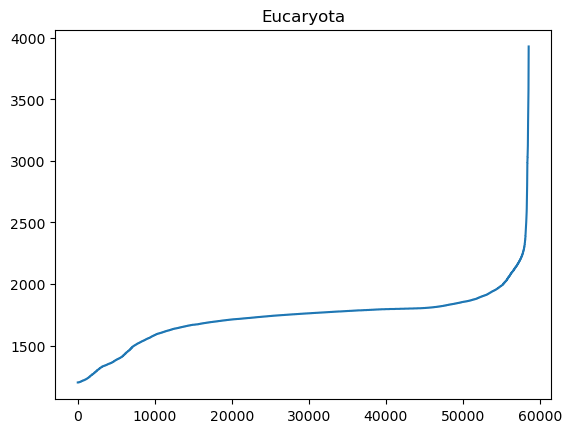

1451.0


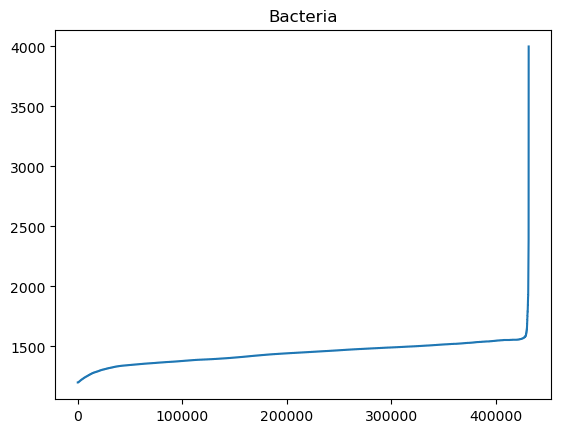

1193.0


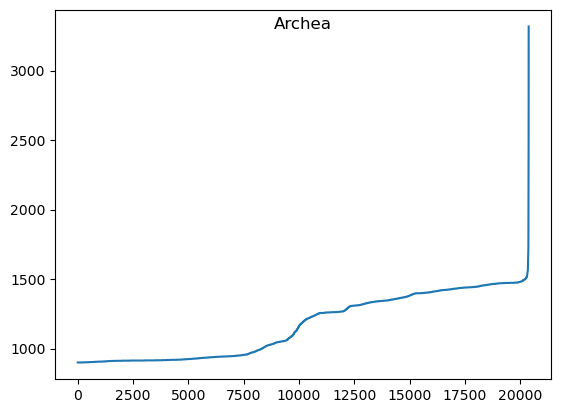

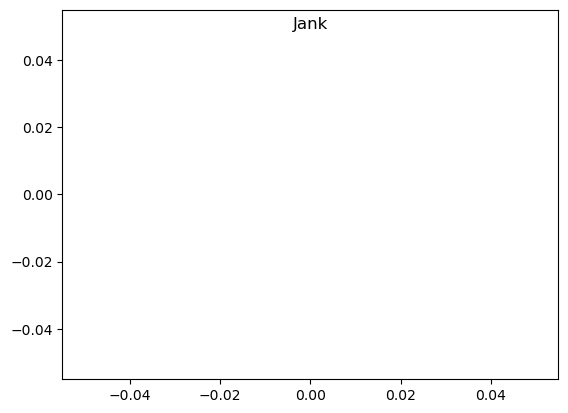

In [115]:
#hossz subplotokba szedve


            
euk.sort()
print(numpy.median(euk))

#plt.subplot(3, 3, 1)
plt.plot(euk)
plt.title("Eucaryota")
plt.show()


pro.sort()
print(numpy.median(pro))
#plt.subplot(3, 3, 3)
plt.plot(pro)
plt.title("Bacteria")
plt.show()

arc.sort()
print(numpy.median(arc))

#plt.subplot(3, 3, 7)
plt.plot(arc)
plt.title("Archea",y=1.0, pad=-14)
plt.show()

#plt.subplot(3, 3, 9)
plt.plot(jank)
plt.title("Jank", y=1.0, pad=-14)
plt.show()

Eucaryota:
Original: 1759.0
Cut_off: 1755.0
Diff: 4.0
All of the elements: 58544
Elements disregarded: 2127  ->  0.03633164799125444%
Bacteria:
Original: 1451.0
Cut_off: 1451.0
Diff: 0.0
All of the elements: 431575
Elements disregarded: 198  ->  0.00045878468400625615%
Archea:
Original: 1193.0
Cut_off: 1193.0
Diff: 0.0
All of the elements: 20389
Elements disregarded: 11  ->  0.0005395065966942959%


AttributeError: module 'matplotlib.pyplot' has no attribute 'set_xdata'

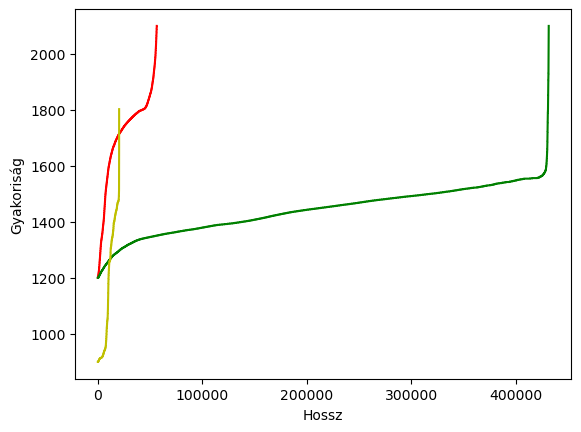

In [103]:
#Cut-off a végről, doménenként szekvencia hosszának ábrázolása.

def cut_out(arr, a):
    for i in range(0,len(arr)):
        if(arr[i]>=a):
            arr2= arr[0:i]    
            break
    
    
    print("Original: "+str(numpy.median(arr)))    
    print("Cut_off: "+str(numpy.median(arr2)))
    print("Diff: "+str(numpy.median(arr)-numpy.median(arr2)))
    print("All of the elements: "+str(len(arr)))
    print("Elements disregarded: "+str(len(arr)-i) + "  ->  " + str((len(arr)-i)/len(arr)) + "%")

    return arr2
print("Eucaryota:")
cf_euc= cut_out(euk,2100)

print("Bacteria:")
cf_pro = cut_out(pro,2100)

print("Archea:")
cf_arc = cut_out(arc,2100)


plt.plot(cf_euc, color='r', label='Eukaryota')
plt.plot(cf_pro, color='g', label='Bacteria')
plt.plot(cf_arc, color='y', label='Archaea')


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Hossz")
plt.ylabel("Gyakoriság")


newx = 2100
newy = cf_euc
plt.set_xdata(newy)
plt.set_ydata(newx)
  
    
    
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()


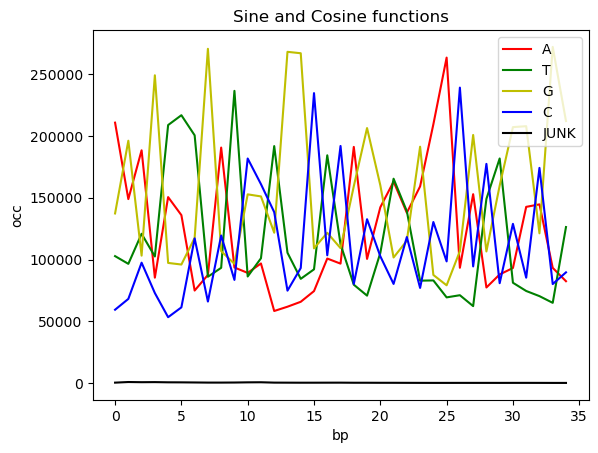

In [48]:
bias_A = [0]*35
bias_T = [0]*35
bias_G = [0]*35
bias_C = [0]*35
bias_JUNK = [0]*35

count=0

with open("csado7/SILVA132/SILVA/library/silva.fna") as input_handle:
    for record in SeqIO.parse(input_handle, "fasta"):
        count+=1
        
        
        seq_prim_bias=record.seq[0:35]    
        for j in range(0,len(seq_prim_bias)):
            if seq_prim_bias[j]=="A":
                bias_A[j] +=1
            elif seq_prim_bias[j]=="T":
                bias_T[j]+=1
            elif seq_prim_bias[j]=="G":
                bias_G[j]+=1
            elif seq_prim_bias[j]=="C":
                bias_C[j]+=1
            else:
                bias_JUNK[j]+=1
        

plt.plot(bias_A, color='r', label='A')
plt.plot(bias_T, color='g', label='T')
plt.plot(bias_G, color='y', label='G')
plt.plot(bias_C, color='blue', label='C')
plt.plot(bias_JUNK, color='black', label='JUNK')
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("bp")
plt.ylabel("occ")
plt.title("Bázisok előfordulási gyakorisága:")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()

[446, 945, 803, 870, 711, 675, 586, 485, 484, 541, 687, 750, 460, 426, 391, 398, 418, 435, 364, 356, 323, 315, 286, 260, 242, 245, 256, 251, 254, 244, 260, 264, 249, 225, 219]


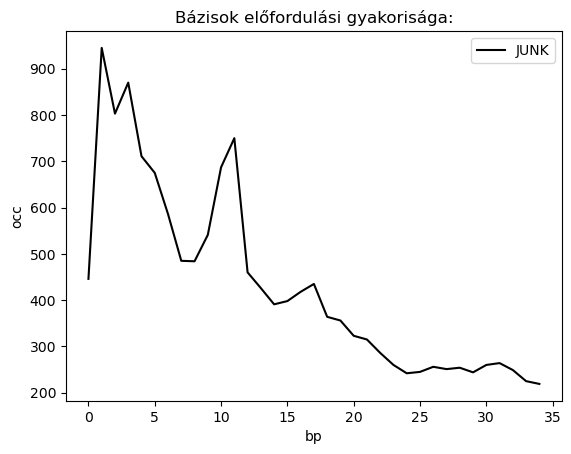

In [53]:
print(bias_JUNK)
#plt.plot(bias_A, color='r', label='A')
#plt.plot(bias_T, color='g', label='T')
#plt.plot(bias_G, color='y', label='G')
#plt.plot(bias_C, color='blue', label='C')
plt.plot(bias_JUNK, color='black', label='JUNK')
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("bp")
plt.ylabel("occ")
plt.title("Bázisok előfordulási gyakorisága:")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()

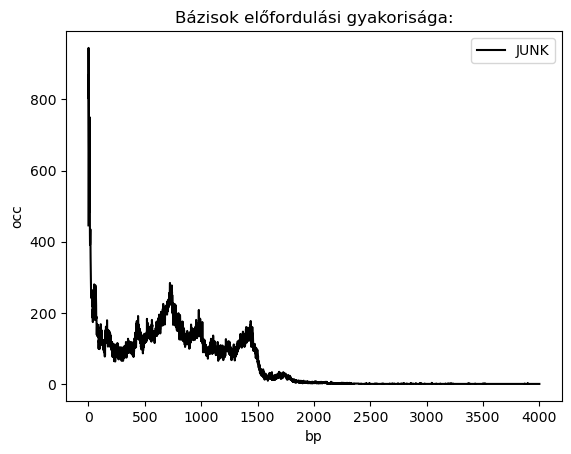

In [62]:
#BIAS for the whole seq, jsut for JUNK


bias_JUNK = [0]*4000

count=0

with open("csado7/SILVA132/SILVA/library/silva.fna") as input_handle:
    for record in SeqIO.parse(input_handle, "fasta"):
        count+=1
        
        
        seq_prim_bias=record.seq    
        
        for j in range(0,len(seq_prim_bias)):
            if seq_prim_bias[j] !="A" and seq_prim_bias[j] !="T" and seq_prim_bias[j] !="G" and seq_prim_bias[j] !="C":
                bias_JUNK[j]+=1
            
        


plt.plot(bias_JUNK, color='black', label='JUNK')
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("bp")
plt.ylabel("occ")
plt.title("Bázisok előfordulási gyakorisága:")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()

In [78]:
def bias_percentage(v):
    add_up =0
    
    for k in range(0,len(v)):
        add_up += v[k]
        

    return add_up


A = bias_percentage(bias_A)
print(A)
T = bias_percentage(bias_T)
C = bias_percentage(bias_C)
G = bias_percentage(bias_G)

print("A előfordulásának gyakorisága: " + str(round(A/(A+T+G+C)*100,4))+"%")
print("T előfordulásának gyakorisága: " + str(round(T/(A+T+G+C)*100,4))+"%")
print("C előfordulásának gyakorisága: " + str(round(C/(A+T+G+C)*100,4))+"%")
print("G előfordulásának gyakorisága: " + str(round(G/(A+T+G+C)*100,4))+"%")


4343729
A előfordulásának gyakorisága: 24.331%
T előfordulásának gyakorisága: 22.9586%
C előfordulásának gyakorisága: 22.1064%
G előfordulásának gyakorisága: 30.604%


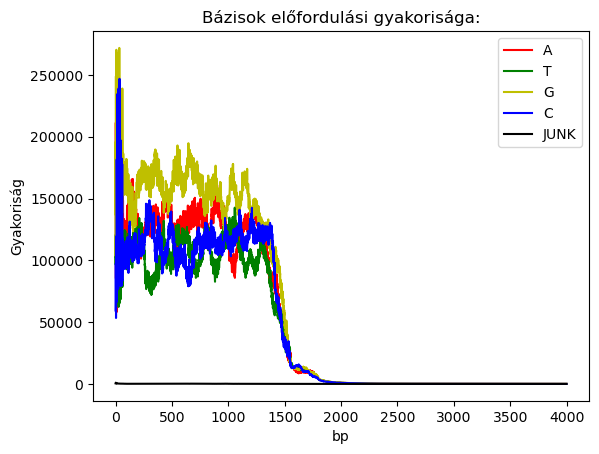

A előfordulásának gyakorisága: 1%
T előfordulásának gyakorisága: 1%
C előfordulásának gyakorisága: 1%
G előfordulásának gyakorisága: 1%


In [73]:
bias_A_whole_seq = [0]*4000
bias_T_whole_seq = [0]*4000
bias_G_whole_seq = [0]*4000
bias_C_whole_seq = [0]*4000
bias_JUNK_whole_seq = [0]*4000

count=0
trim=0
with open("csado7/SILVA132/SILVA/library/silva.fna") as input_handle:
    for record in SeqIO.parse(input_handle, "fasta"):
        count+=1
        
        if len(record.seq) > 4000:
            seq_prim_bias=record.seq[0:4000]
            
            #trim_bias
            trim+=1
            
        else:
            seq_prim_bias=record.seq
        
        
        for j in range(0,len(seq_prim_bias)):
            if seq_prim_bias[j]=="A":
                bias_A_whole_seq[j] +=1
            elif seq_prim_bias[j]=="T":
                bias_T_whole_seq[j]+=1
            elif seq_prim_bias[j]=="G":
                bias_G_whole_seq[j]+=1
            elif seq_prim_bias[j]=="C":
                bias_C_whole_seq[j]+=1
            else:
                bias_JUNK_whole_seq[j]+=1
        

plt.plot(bias_A_whole_seq, color='r', label='A')
plt.plot(bias_T_whole_seq, color='g', label='T')
plt.plot(bias_G_whole_seq, color='y', label='G')
plt.plot(bias_C_whole_seq, color='blue', label='C')
plt.plot(bias_JUNK_whole_seq, color='black', label='JUNK')
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("bp")
plt.ylabel("Gyakoriság")
plt.title("Bázisok előfordulási gyakorisága:")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()



A_whole_seq = bias_percentage(bias_A_whole_seq)

T_whole_seq = bias_percentage(bias_T_whole_seq)
C_whole_seq = bias_percentage(bias_C_whole_seq)
G_whole_seq = bias_percentage(bias_G_whole_seq)
ATGC = T_whole_seq+C_whole_seq+A_whole_seq+G_whole_seq
print("A előfordulásának gyakorisága: " + str(round(A/ATGC*100))+"%")
print("T előfordulásának gyakorisága: " + str(round(T/ATGC*100))+"%")
print("C előfordulásának gyakorisága: " + str(round(C/ATGC*100))+"%")
print("G előfordulásának gyakorisága: " + str(round(G/ATGC*100))+"%")


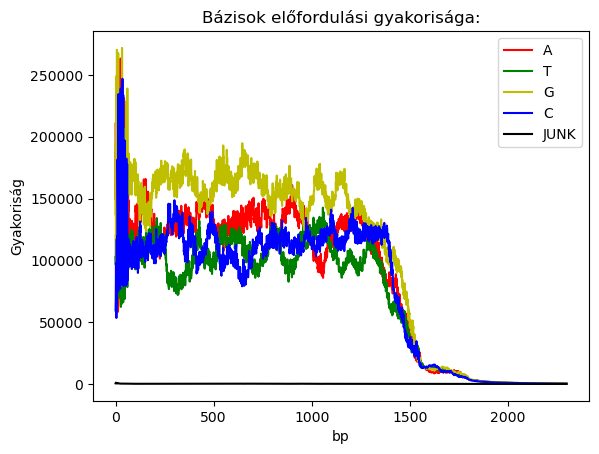

A előfordulásának gyakorisága: 25.3002%
T előfordulásának gyakorisága: 21.124%
C előfordulásának gyakorisága: 22.7661%
G előfordulásának gyakorisága: 30.8097%
Levágott rész:0


In [84]:

plt.plot(bias_A_whole_seq[0:2300], color='r', label='A')
plt.plot(bias_T_whole_seq[0:2300], color='g', label='T')
plt.plot(bias_G_whole_seq[0:2300], color='y', label='G')
plt.plot(bias_C_whole_seq[0:2300], color='blue', label='C')
plt.plot(bias_JUNK_whole_seq[0:2300], color='black', label='JUNK')
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("bp")
plt.ylabel("Gyakoriság")
plt.title("Bázisok előfordulási gyakorisága:")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()



A_whole_seq = bias_percentage(bias_A_whole_seq[0:4000])

T_whole_seq = bias_percentage(bias_T_whole_seq[0:4000])
C_whole_seq = bias_percentage(bias_C_whole_seq[0:4000])
G_whole_seq = bias_percentage(bias_G_whole_seq[0:4000])
ATGC = T_whole_seq+C_whole_seq+A_whole_seq+G_whole_seq
print("A előfordulásának gyakorisága: " + str(round(A_whole_seq/ATGC*100,4))+"%")
print("T előfordulásának gyakorisága: " + str(round(T_whole_seq/ATGC*100,4))+"%")
print("C előfordulásának gyakorisága: " + str(round(C_whole_seq/ATGC*100,4))+"%")
print("G előfordulásának gyakorisága: " + str(round(G_whole_seq/ATGC*100,4))+"%")
print("Levágott rész:" + str(trim))

In [124]:
#Bias_JUNK előfordulása egész:
all_junk =bias_percentage(bias_JUNK)


print(str(all_junk/ATGC*100))



0.028765103568151387


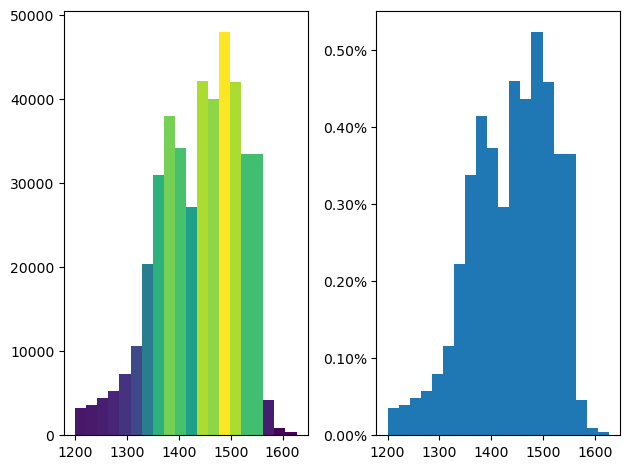

In [160]:
#----------HISTOGRAM-------------------------------
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter




n_bins = 20 #37 darab elsz
dist1 = pro[0:len(pro)-2000]
dist2 = len(pro)


fig, axs = plt.subplots(1, 2, tight_layout=True)

# N is the count in each bin, bins is the lower-limit of the bin
N, bins, patches = axs[0].hist(dist1, bins=n_bins)

# We'll color code by height, but you could use any scalar
fracs = N / N.max()

# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

# We can also normalize our inputs by the total number of counts
axs[1].hist(dist1, bins=n_bins, density=True)

# Now we format the y-axis to display percentage
axs[1].yaxis.set_major_formatter(PercentFormatter(xmax=1))

(array([ 2686.,  2695.,  3213.,  3423.,  4460.,  5635.,  7527.,  9904.,
        20379., 25873., 26483., 33537., 23039., 24906., 33452., 31942.,
        37061., 37631., 31766., 25109., 31574.,  4966.,  1559.,   460.,
          295.]),
 array([1200.  , 1217.08, 1234.16, 1251.24, 1268.32, 1285.4 , 1302.48,
        1319.56, 1336.64, 1353.72, 1370.8 , 1387.88, 1404.96, 1422.04,
        1439.12, 1456.2 , 1473.28, 1490.36, 1507.44, 1524.52, 1541.6 ,
        1558.68, 1575.76, 1592.84, 1609.92, 1627.  ]),
 <BarContainer object of 25 artists>)

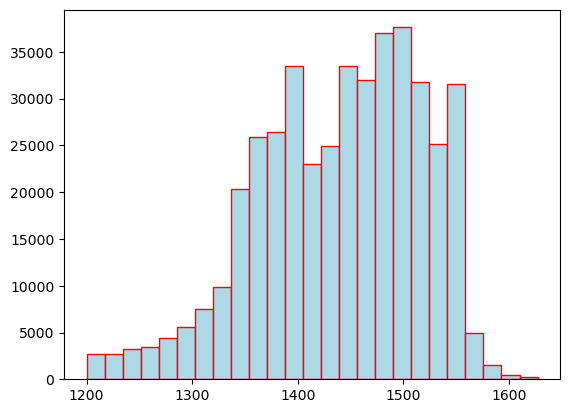

In [153]:

#utolso 2000 elemet levágjuk, mert biztos nem relevánsak, elrontják a bin-eket
plt.hist(pro[0:len(pro)-2000], bins=25, color = "lightblue", ec="red")